# 1.0 Import

In [5]:
#Load and edit dataframe
import pandas as pd
import warnings 
warnings.filterwarnings( 'ignore' ) 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Select Variables
from sklearn.feature_selection import SelectKBest

# ML - Algoritms
from sklearn.model_selection   import GridSearchCV
from sklearn.neural_network    import MLPRegressor
from sklearn.preprocessing     import MinMaxScaler
from sklearn                   import datasets, linear_model

# Metric
from sklearn.metrics           import mean_squared_error, r2_score


## Load DataSet

In [23]:
df = pd.read_csv('../dataset/all_bovespa.parquet')

In [24]:
df1 = df.copy()

# Data Analysis


In [25]:
print(f'nº of columns: {df1.shape[0]}, nº of rows:{df1.shape[1]}')

nº of columns: 1001978, nº of rows:9


# Select only one share to predict

In [26]:
# Filter share_data
acao = 'PETR4'
df_acao = df1[df1['sigla_acao']==acao]
print(f'nº of columns: {df_acao.shape[0]}, nº of rows:{df_acao.shape[1]}')

nº of columns: 2565, nº of rows:9


# Data transformation

In [27]:
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

# Feature Engirennering

In [28]:
# Average moving 
df_acao['avg_5d'] = df_acao['preco_fechamento'].rolling(5).mean()
#.rolling method is used to provide rolling window calculations and math operations.
df_acao['avg_21d'] = df_acao['preco_fechamento'].rolling(21).mean()

In [29]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,avg_5d,avg_21d
219,2012-01-02,PETR4,PETROBRAS,21.51,22.12,21.26,21.73,20482400,4,NaN,NaN
551,2012-01-03,PETR4,PETROBRAS,21.83,22.41,21.81,22.41,23089200,5,NaN,NaN
885,2012-01-04,PETR4,PETROBRAS,22.18,22.58,21.98,22.57,19026800,4,NaN,NaN
1213,2012-01-05,PETR4,PETROBRAS,22.39,22.61,22.15,22.31,19589900,4,NaN,NaN
1533,2012-01-06,PETR4,PETROBRAS,22.47,22.58,22.25,22.33,14046800,3,22.270,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1000547,2023-05-11,PETR4,PETROBRAS,24.13,25.48,23.93,25.43,136878100,33,24.612,25.402857
1000612,2023-05-12,PETR4,PETROBRAS,25.58,26.74,25.48,26.25,117237500,30,25.062,25.430952
1001226,2023-05-15,PETR4,PETROBRAS,26.06,26.15,25.40,25.66,81996700,21,25.292,25.421905
1001523,2023-05-16,PETR4,PETROBRAS,26.11,27.03,26.08,26.30,117782700,31,25.634,25.434762


In [30]:
# Pushing action values to validate prediction 
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(-1)
"""The .shift() method is used to shift the DataFrame index by a 
specified number of periods with an optional time frequency."""

'The .shift() method is used to shift the DataFrame index by a \nspecified number of periods with an optional time frequency.'

## Clean DataFrame dropna()

In [31]:
# DropNAN
df_acao.dropna(inplace=True)

In [32]:
df_acao.head()

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,avg_5d,avg_21d
6678,2012-01-31,PETR4,PETROBRAS,24.75,24.94,24.33,24.95,29338900,7,24.826,23.591905
7017,2012-02-01,PETR4,PETROBRAS,24.70,25.17,24.63,24.53,24547000,6,24.736,23.745238
7353,2012-02-02,PETR4,PETROBRAS,24.88,25.22,24.45,24.61,26863500,6,24.658,23.846190
7679,2012-02-03,PETR4,PETROBRAS,24.47,24.93,24.37,24.86,20422300,5,24.646,23.943333
8000,2012-02-06,PETR4,PETROBRAS,24.49,24.86,24.40,25.60,14563700,3,24.704,24.064762


Assumption:
At this point, I cleaned the dataframe by removing all null values, with that we lost 21 lines of the dataframe which does not offer any significant loss of the set.

In [33]:
df1.info()
# Original values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001978 entries, 0 to 1001977
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   data_pregao       1001978 non-null  object 
 1   sigla_acao        1001978 non-null  object 
 2   nome_acao         1001978 non-null  object 
 3   preco_abertura    1001978 non-null  float64
 4   preco_maximo      1001978 non-null  float64
 5   preco_minimo      1001978 non-null  float64
 6   preco_fechamento  1001978 non-null  float64
 7   qtd_negocios      1001978 non-null  int64  
 8   volume_negocios   1001978 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 68.8+ MB


In [34]:
df_acao.info()
# After cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 6678 to 1001523
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_pregao       2544 non-null   datetime64[ns]
 1   sigla_acao        2544 non-null   object        
 2   nome_acao         2544 non-null   object        
 3   preco_abertura    2544 non-null   float64       
 4   preco_maximo      2544 non-null   float64       
 5   preco_minimo      2544 non-null   float64       
 6   preco_fechamento  2544 non-null   float64       
 7   qtd_negocios      2544 non-null   int64         
 8   volume_negocios   2544 non-null   int64         
 9   avg_5d            2544 non-null   float64       
 10  avg_21d           2544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 238.5+ KB


In [35]:
qntt_rows = len(df_acao)
r_train = qntt_rows - 763 # 70% to train
r_test = qntt_rows - 25 # 29% to test

r_validation = r_train - r_test  # 1% to validation

info = (
    f'Train = 0:{r_train} | '
    f'Test = {r_train}:{r_test} | '
    f'Validation = {r_test}:{qntt_rows}')
info

'Train = 0:1781 | Test = 1781:2519 | Validation = 2519:2544'

In [36]:
# Re-index to DataFrame
df_acao = df_acao.reset_index(drop=True)

# Feature Selection

In [37]:
feature = df_acao.drop(['data_pregao', 'sigla_acao', 'nome_acao','preco_fechamento'], axis=1)
target = df_acao['preco_fechamento']

In [38]:
display(feature.head())

,preco_abertura,preco_maximo,preco_minimo,qtd_negocios,volume_negocios,avg_5d,avg_21d
0,24.75,24.94,24.33,29338900,7,24.826,23.591905
1,24.70,25.17,24.63,24547000,6,24.736,23.745238
2,24.88,25.22,24.45,26863500,6,24.658,23.846190
3,24.47,24.93,24.37,20422300,5,24.646,23.943333
4,24.49,24.86,24.40,14563700,3,24.704,24.064762


In [39]:
#Escolhendo as melhores features com Kbest
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

features_list = ('preco_abertura', 'preco_maximo',
                 'preco_minimo', 'qtd_negocios',
                 'volume_negocios', 'avg_5d', 'avg_21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(feature, target)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Best features:")
print (k_best_features_final)


Best features:
{'qtd_negocios': 101.24550597902996, 'preco_minimo': 100.75621293798986, 'preco_maximo': 90.50792569593072, 'avg_21d': 80.30667233301011, 'avg_5d': 1.795108356819331, 'volume_negocios': 1.072424386484503}


**_In "feature selection", i could see that the "aveg_5d" and "volume_negocios" features doesn't offer us any significant value as its result is below 0 and 1. I'll drop these values in the training set._**

In [40]:
# result feature selection
features = df_acao.drop(['data_pregao', 'sigla_acao', 'nome_acao','preco_fechamento', 'avg_5d', 'volume_negocios'], axis=1)

In [42]:
print('Features:')
print(features.head())

print('===============')

print('Target:')
print(target.head())


Features:
   preco_abertura  preco_maximo  preco_minimo  qtd_negocios    avg_21d
0           24.75         24.94         24.33      29338900  23.591905
1           24.70         25.17         24.63      24547000  23.745238
2           24.88         25.22         24.45      26863500  23.846190
3           24.47         24.93         24.37      20422300  23.943333
4           24.49         24.86         24.40      14563700  24.064762
Target:
0    24.95
1    24.53
2    24.61
3    24.86
4    25.60
Name: preco_fechamento, dtype: float64


In [43]:
# Reescale to features
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (2544, 5)
[[0.7538518  0.75190979 0.76235383 0.0487199  0.73662347]
 [0.75201761 0.76027646 0.77367031 0.03882941 0.74254205]
 [0.75862069 0.76209531 0.76688042 0.04361067 0.74643875]
 ...
 [0.78429934 0.81738814 0.80573369 0.23014262 0.80760959]
 [0.80190756 0.79592579 0.80271596 0.1574056  0.80726036]
 [0.80374175 0.82793743 0.82836665 0.23126791 0.80775664]]


# Data Train and Test

In [44]:
X_train = features_scale[:r_train]
X_test = features_scale[r_train:r_test]

y_train = target[:r_train]
y_test = target[r_train:r_test]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))



1781 1781
738 738


# Machine Learn  - Model's

## Linear-Regressor

In [45]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
cd =r2_score(y_test, pred)

f'Determination coefficient:{cd * 100:.2f}'
#'Determination coefficient:89.18'

'Determination coefficient:89.18'

**_"The coefficient of determination, also called R², is a measure of the fit of a generalized linear statistical model, such as simple or multiple linear regression, to the observed values of a random variable. The R² varies between 0 and 1, sometimes being expressed in percentage terms. In this case, it expresses the amount of data variance that is explained by the linear model. Thus, the higher the R², the more explanatory the linear model is, that is, the better it fits the sample. For example, a R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model."_**

## MLP Regressor

In [46]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)

f'Determination coefficient:{cd * 100:.2f}'
#'Determination coefficient:89.25'

'Determination coefficient:89.25'

In [82]:
### HyperParameters Fine-Tunning

In [47]:
rn_ft = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train,y_train)
clf = search.best_estimator_
pred= search.predict(X_test)

cd = search.score(X_test, y_test)

f'Determination coefficient:{cd * 100:.2f}'
#'Determination coefficient:89.19'

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) 

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multila

/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bruno/.pyenv/versions/3.9.10/envs/b3_share/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) 

'Determination coefficient:89.19'

In [48]:
# Predict
predict = features_scale[r_test:qntt_rows]

data_pregao_full = df_acao['data_pregao']
data_pregao = data_pregao_full[r_test:qntt_rows]

res_full = df_acao['preco_fechamento']
res = res_full[r_test:qntt_rows]

pred = rn.predict(predict)

df_pred = pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'predict':pred})

df_pred['real'] = df_pred['real'].shift(+1)  #→ return to original date

df_pred.set_index('data_pregao', inplace=True)

print(df_pred)

              real    predict
data_pregao                  
2023-04-10     NaN  24.232361
2023-04-11   25.66  25.014791
2023-04-12   25.85  25.732495
2023-04-13   26.03  25.743174
2023-04-14   26.30  25.808540
2023-04-17   26.71  26.263292
2023-04-18   27.39  26.937349
2023-04-19   26.51  26.905337
2023-04-20   26.69  26.505275
2023-04-24   27.20  26.614351
2023-04-25   27.09  26.975999
2023-04-26   26.75  26.830776
2023-04-27   26.10  26.630656
2023-04-28   23.70  23.616176
2023-05-02   22.74  23.350972
2023-05-03   22.66  22.687372
2023-05-04   23.02  22.974678
2023-05-05   24.00  23.578256
2023-05-08   24.51  24.429269
2023-05-09   24.59  24.468810
2023-05-10   24.53  24.566148
2023-05-11   25.43  24.554191
2023-05-12   26.25  25.953887
2023-05-15   25.66  25.852573
2023-05-16   26.30  26.424315


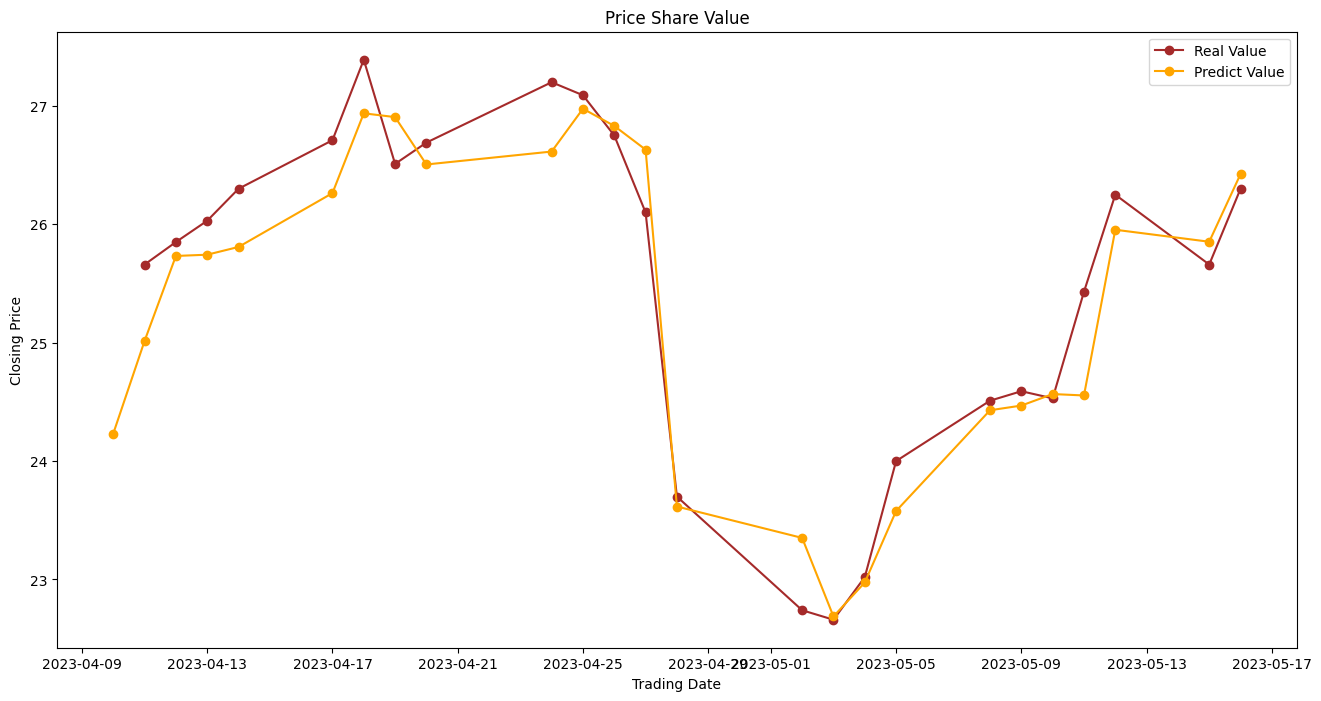

In [49]:
plt.figure(figsize=(16,8))
plt.title('Price Share Value')
plt.plot(df_pred['real'], label='Real Value', color='brown', marker='o');
plt.plot(df_pred['predict'], label='Predict Value', color='orange', marker='o');
plt.xlabel('Trading Date');
plt.ylabel('Closing Price');
leg = plt.legend()

#Finish